# Draft analysis 

---

Group name: Group F (Ji Soo Ha & Alexander Hörmann)

---


## Introduction

*This section includes an introduction to the project motivation, data, and research question. Include a data dictionary* 

## Setup

In [227]:
import numpy as np
import pandas as pd
import altair as alt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

## Data

## Import data

In [144]:
df = pd.read_csv('C:/Users/ji_so/Desktop/HA/UNI/HdM/Applied Statistics/Projekt/Second Projekt Idea/Labor_Productivity_Analysis_final.csv',sep=';',decimal=',')

### Data structure

In [145]:
df

,Continent,Country,Code,Year,Average annual working hours per worker,GDP per capita,Population,gini_coefficient,Life satisfaction,Productivity,Current health expenditure per capita
0,Americas,Argentina,ARG,2017,1691.5363,23272.18,44054616,NaN,6.085561,30.955460,2470.11
1,Oceania,Australia,AUS,2017,1731.4943,52536.19,24590336,NaN,7.233995,60.341679,4715.83
2,Europe,Austria,AUT,2017,1613.0519,51954.28,8797497,0.297376,7.195361,64.780170,5641.18
3,Asia,Bangladesh,BGD,2017,2232.3542,4112.70,161793968,NaN,5.114217,4.307637,101.18
4,Europe,Belgium,BEL,2017,1544.2690,45150.20,11384491,0.273880,6.772138,68.516521,5450.48
...,...,...,...,...,...,...,...,...,...,...,...
61,Asia,Turkey,TUR,2017,1832.0000,26611.18,82089824,0.414057,4.872074,41.799203,1166.73
62,Europe,United Kingdom,GBR,2017,1670.2728,44093.93,66064808,0.351488,7.157151,54.676921,4515.59
63,Americas,United States,USA,2017,1757.2255,60116.57,329791232,0.411806,6.943701,71.638571,10103.09
64,Americas,Uruguay,URY,2017,1552.3470,20615.56,3422205,0.394645,6.600337,28.295846,2029.89


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 11 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Continent                                66 non-null     object 
 1   Country                                  66 non-null     object 
 2   Code                                     66 non-null     object 
 3   Year                                     66 non-null     int64  
 4   Average annual working hours per worker  66 non-null     float64
 5   GDP per capita                           66 non-null     float64
 6   Population                               66 non-null     int64  
 7   gini_coefficient                         48 non-null     float64
 8   Life satisfaction                        65 non-null     float64
 9   Productivity                             65 non-null     float64
 10  Current health expenditure per capita    64 non-null

### Data corrections

In [147]:
# variable Continent is categorical
df['Continent'] = df['Continent'].astype('category')

In [148]:
# variable Country is categorical
df['Country'] = df['Country'].astype('category')

In [149]:
# replace nan values with average of columns
df = df.fillna(df.mean())

C:\Users\ji_so\AppData\Local\Temp\ipykernel_15248\649355262.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


In [150]:
df

,Continent,Country,Code,Year,Average annual working hours per worker,GDP per capita,Population,gini_coefficient,Life satisfaction,Productivity,Current health expenditure per capita
0,Americas,Argentina,ARG,2017,1691.5363,23272.18,44054616,0.345499,6.085561,30.955460,2470.11
1,Oceania,Australia,AUS,2017,1731.4943,52536.19,24590336,0.345499,7.233995,60.341679,4715.83
2,Europe,Austria,AUT,2017,1613.0519,51954.28,8797497,0.297376,7.195361,64.780170,5641.18
3,Asia,Bangladesh,BGD,2017,2232.3542,4112.70,161793968,0.345499,5.114217,4.307637,101.18
4,Europe,Belgium,BEL,2017,1544.2690,45150.20,11384491,0.273880,6.772138,68.516521,5450.48
...,...,...,...,...,...,...,...,...,...,...,...
61,Asia,Turkey,TUR,2017,1832.0000,26611.18,82089824,0.414057,4.872074,41.799203,1166.73
62,Europe,United Kingdom,GBR,2017,1670.2728,44093.93,66064808,0.351488,7.157151,54.676921,4515.59
63,Americas,United States,USA,2017,1757.2255,60116.57,329791232,0.411806,6.943701,71.638571,10103.09
64,Americas,Uruguay,URY,2017,1552.3470,20615.56,3422205,0.394645,6.600337,28.295846,2029.89


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 11 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   Continent                                66 non-null     category
 1   Country                                  66 non-null     category
 2   Code                                     66 non-null     object  
 3   Year                                     66 non-null     int64   
 4   Average annual working hours per worker  66 non-null     float64 
 5   GDP per capita                           66 non-null     float64 
 6   Population                               66 non-null     int64   
 7   gini_coefficient                         66 non-null     float64 
 8   Life satisfaction                        66 non-null     float64 
 9   Productivity                             66 non-null     float64 
 10  Current health expenditure per capita   

### Variable lists

In [179]:
# define outcome variable as y_label
y_label = 'Productivity'

# select features
features = ["Average annual working hours per worker", 
            "GDP per capita",
            "Population",
            "gini_coefficient",
            "Life satisfaction",
            "Current health expenditure per capita"
            ]


# create feature data
X = df[features]

# create response
y = df[y_label]

### Data splitting

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=42)

In [181]:
X_train

,Average annual working hours per worker,GDP per capita,Population,gini_coefficient,Life satisfaction,Current health expenditure per capita
34,1518.8575,90597.55,596290,0.345157,7.404016,5980.640000
25,1493.3651,49844.32,343641,0.261316,7.532505,4762.730000
3,2232.3542,4112.70,161793968,0.345499,5.114217,101.180000
17,1701.3558,11413.08,16696947,0.446730,5.809131,863.050000
40,1752.0000,39728.86,4746253,0.345499,7.205174,3875.540000
8,1696.4624,48902.64,36554344,0.333082,7.109076,5208.720000
6,1643.5475,19579.83,7182430,0.403790,5.108438,1607.710000
28,1745.6843,86808.65,4771860,0.313598,7.254841,5582.930000
4,1544.2690,45150.20,11384491,0.273880,6.772138,5450.480000
48,1805.9998,25424.06,19698852,0.360168,6.129942,1398.550000


In [182]:
# data exploration set
df_train = pd.DataFrame(X_train.copy())
df_train = df_train.join(pd.DataFrame(y_train))

## Analysis

### Descriptive statistics

In [183]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Average annual working hours per worker,52.0,1.861424e+03,2.693280e+02,1353.886800,1.658233e+03,1.844341e+03,2.031379e+03,2.455551e+03
GDP per capita,52.0,3.399115e+04,2.126770e+04,3950.930000,1.837127e+04,3.070581e+04,4.625722e+04,9.059755e+04
Population,52.0,9.095150e+07,2.667830e+08,343641.000000,5.700403e+06,1.626382e+07,5.337656e+07,1.410276e+09
gini_coefficient,52.0,3.370721e-01,5.120529e-02,0.232378,3.052685e-01,3.454992e-01,3.566471e-01,4.971548e-01
Life satisfaction,52.0,6.190149e+00,9.956384e-01,3.248770,5.604619e+00,6.221713e+00,7.053873e+00,7.780348e+00
Current health expenditure per capita,52.0,2.828910e+03,2.062751e+03,101.180000,1.085205e+03,2.429245e+03,4.477472e+03,7.989640e+03
Productivity,52.0,3.992967e+01,2.461746e+01,3.022650,2.027895e+01,3.719092e+01,5.691295e+01,1.094883e+02


### Exploratory data analysis

In [184]:
alt.Chart(df_train).mark_bar().encode(
    alt.X(alt.repeat("column"), type="quantitative", bin=True),
    y='count()',
).properties(
    width=150,
    height=150
).repeat(
    column=['Productivity', 'Average annual working hours per worker', 'GDP per capita', 'Population','gini_coefficient','Life satisfaction','Current health expenditure per capita']
)

c:\Users\ji_so\anaconda3\envs\stats\lib\site-packages\altair\utils\core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.RepeatChart(...)

In [185]:
alt.Chart(df_train).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative')
).properties(
    width=150,
    height=150
).repeat(
    row=['Productivity', 'Average annual working hours per worker', 'GDP per capita', 'Population','gini_coefficient','Life satisfaction','Current health expenditure per capita'],
    column=['Productivity', 'Average annual working hours per worker', 'GDP per capita', 'Population','gini_coefficient','Life satisfaction','Current health expenditure per capita']
).interactive()

alt.RepeatChart(...)

### Relationships

In [186]:
# inspect correlation between outcome and possible predictors
corr = df_train.corr()
corr[y_label].sort_values(ascending=False)

Productivity                               1.000000
Current health expenditure per capita      0.936495
GDP per capita                             0.933883
Life satisfaction                          0.779224
Population                                -0.323232
gini_coefficient                          -0.467469
Average annual working hours per worker   -0.723444
Name: Productivity, dtype: float64

In [187]:
# take a look at all correlations
corr.style.background_gradient(cmap='Blues')

,Average annual working hours per worker,GDP per capita,Population,gini_coefficient,Life satisfaction,Current health expenditure per capita,Productivity
Average annual working hours per worker,1.000000,-0.560226,0.271971,0.300921,-0.659820,-0.735451,-0.723444
GDP per capita,-0.560226,1.000000,-0.306050,-0.387756,0.751088,0.894475,0.933883
Population,0.271971,-0.306050,1.000000,0.204588,-0.476140,-0.307735,-0.323232
gini_coefficient,0.300921,-0.387756,0.204588,1.000000,-0.364692,-0.482876,-0.467469
Life satisfaction,-0.659820,0.751088,-0.476140,-0.364692,1.000000,0.826474,0.779224
Current health expenditure per capita,-0.735451,0.894475,-0.307735,-0.482876,0.826474,1.000000,0.936495
Productivity,-0.723444,0.933883,-0.323232,-0.467469,0.779224,0.936495,1.000000


## Model

### Select model

In [188]:
# Choose the linear regression model
reg = LinearRegression()

### Training and validation

In [190]:
# cross-validation with 5 folds
scores = cross_val_score(reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error') *-1

In [191]:
# store cross-validation scores
df_scores = pd.DataFrame({"lr": scores})

# reset index to match the number of folds
df_scores.index += 1

# print dataframe
df_scores.style.background_gradient(cmap='Blues')

,lr
1,91.515318
2,86.794334
3,29.701145
4,12.778268
5,35.403754


In [192]:
alt.Chart(df_scores.reset_index()).mark_line(
     point=alt.OverlayMarkDef()
).encode(
    x=alt.X("index", bin=False, title="Fold", axis=alt.Axis(tickCount=5)),
    y=alt.Y("lr", aggregate="mean", title="Mean squared error (MSE)")
)

c:\Users\ji_so\anaconda3\envs\stats\lib\site-packages\altair\utils\core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

In [193]:
df_scores.describe().T

,count,mean,std,min,25%,50%,75%,max
lr,5.0,51.238564,35.637851,12.778268,29.701145,35.403754,86.794334,91.515318


### Fit model

In [212]:
# Fit the model to the data
reg.fit(X_train, y_train)

LinearRegression()

In [213]:
# Intercept 
intercept = pd.DataFrame({
    "Name": ["Intercept"],
    "Coefficient":[reg.intercept_]}
    )
intercept

,Name,Coefficient
0,Intercept,62.346101


In [214]:
# Slope coefficients
slope = pd.DataFrame({
    "Name": features,
    "Coefficient": reg.coef_}
)
slope

,Name,Coefficient
0,Average annual working hours per worker,-1.964060e-02
1,GDP per capita,6.960775e-04
2,Population,-1.292313e-09
3,gini_coefficient,-3.208545e+01
4,Life satisfaction,-1.081234e+00
5,Current health expenditure per capita,2.866202e-03


In [215]:
# combine dataframes
table = pd.concat([intercept, slope], ignore_index=True, sort=False)

round(table, 5)

,Name,Coefficient
0,Intercept,62.34610
1,Average annual working hours per worker,-0.01964
2,GDP per capita,0.00070
3,Population,-0.00000
4,gini_coefficient,-32.08545
5,Life satisfaction,-1.08123
6,Current health expenditure per capita,0.00287


In [216]:
# Make predictions on the data
y_pred = reg.predict(X)

In [217]:
mean_squared_error(y, y_pred).round(3)

38.43

### Evaluation on test set

In [218]:
# obtain predictions
y_pred = reg.predict(X_test)

In [219]:
# R squared
r2_score(y_test, y_pred).round(5)

0.86093

In [220]:
# MSE
mean_squared_error(y_test, y_pred).round(5)

56.69373

In [221]:
# RMSE
mean_squared_error(y_test, y_pred, squared=False).round(5)

7.52952

In [222]:
# MAE
mean_absolute_error(y_test, y_pred).round(5)

4.50321

### Check for multicollinearity

C:\Users\ji_so\AppData\Local\Temp\ipykernel_15248\1835051848.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


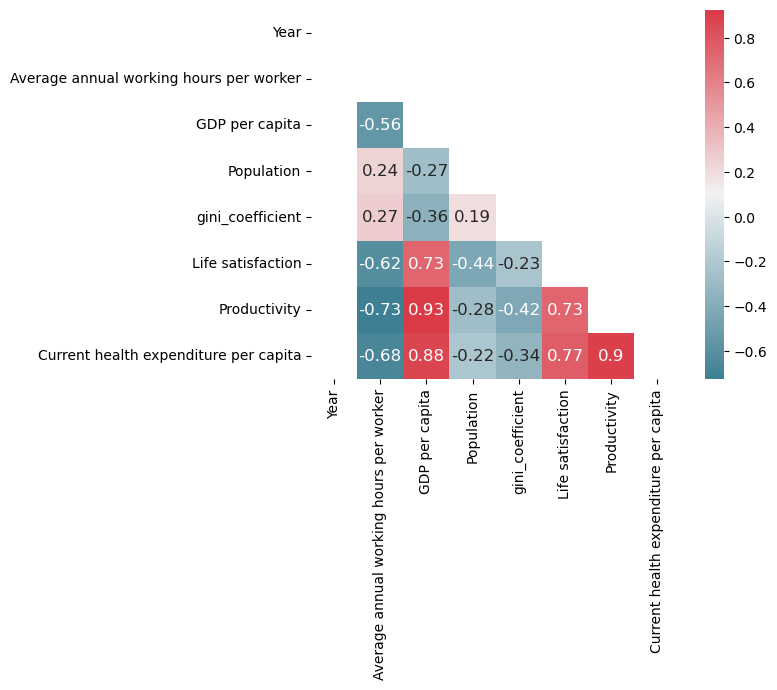

In [225]:
# Inspect correlation
# Calculate correlation using the default method ( "pearson")
corr = df.corr()
# optimize aesthetics: generate mask for removing duplicate / unnecessary info
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Generate a custom diverging colormap as indicator for correlations:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Plot
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True,  square=True, annot_kws={"size": 12});

### Variance inflation factor (VIF)
- The smallest possible value for VIF is 1, which indicates the complete absence of collinearity.
- VIF value that exceeds 5 indicates a problematic amount of collinearity and the parameter estimates will have large standard errors because of this.

In [229]:
# choose features and add constant
features = add_constant(df[['Average annual working hours per worker', 'GDP per capita', 'Population','gini_coefficient','Life satisfaction','Current health expenditure per capita']])
# create empty DataFrame
vif = pd.DataFrame()
# calculate vif
vif["VIF Factor"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
# add feature names
vif["Feature"] = features.columns

vif.round(2)

,VIF Factor,Feature
0,294.13,const
1,2.01,Average annual working hours per worker
2,4.79,GDP per capita
3,1.34,Population
4,1.19,gini_coefficient
5,3.23,Life satisfaction
6,6.49,Current health expenditure per capita


We have a problematic amount of collinearity in our data.
- Current health expenditure per capita

### Save model



Save your model in the folder `models/`. Use a meaningful name and a timestamp.

## Conclusions